# Heart Disease Prediction
Heart disease refers to a variety of conditions that affect the heart — from infections to genetic defects and blood-vessel diseases.
Most heart disease can be prevented with healthy lifestyle choices, yet it’s still the number one health threat in the world.<br>
In this task I will be predicting the heart disease in people using four different Machine Learning models: Support Vector Classifier, Logistic Regression, Random Forest Classifier, and K Neighbors Classifier. 

## Importing Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

## Reading dataset

In [2]:
df = pd.read_csv('heart.csv')
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Analysis & Visualization

In [4]:
#checking for null values
df.isnull().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


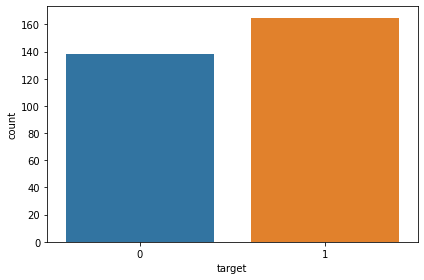

In [5]:
sns.countplot(df['target'])
plt.tight_layout()

In [6]:
df['target'].value_counts()
# 1 --> unhealthy heart
# 0 --> healthy heart

1    165
0    138
Name: target, dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e66cfe390>,
      dtype=object)

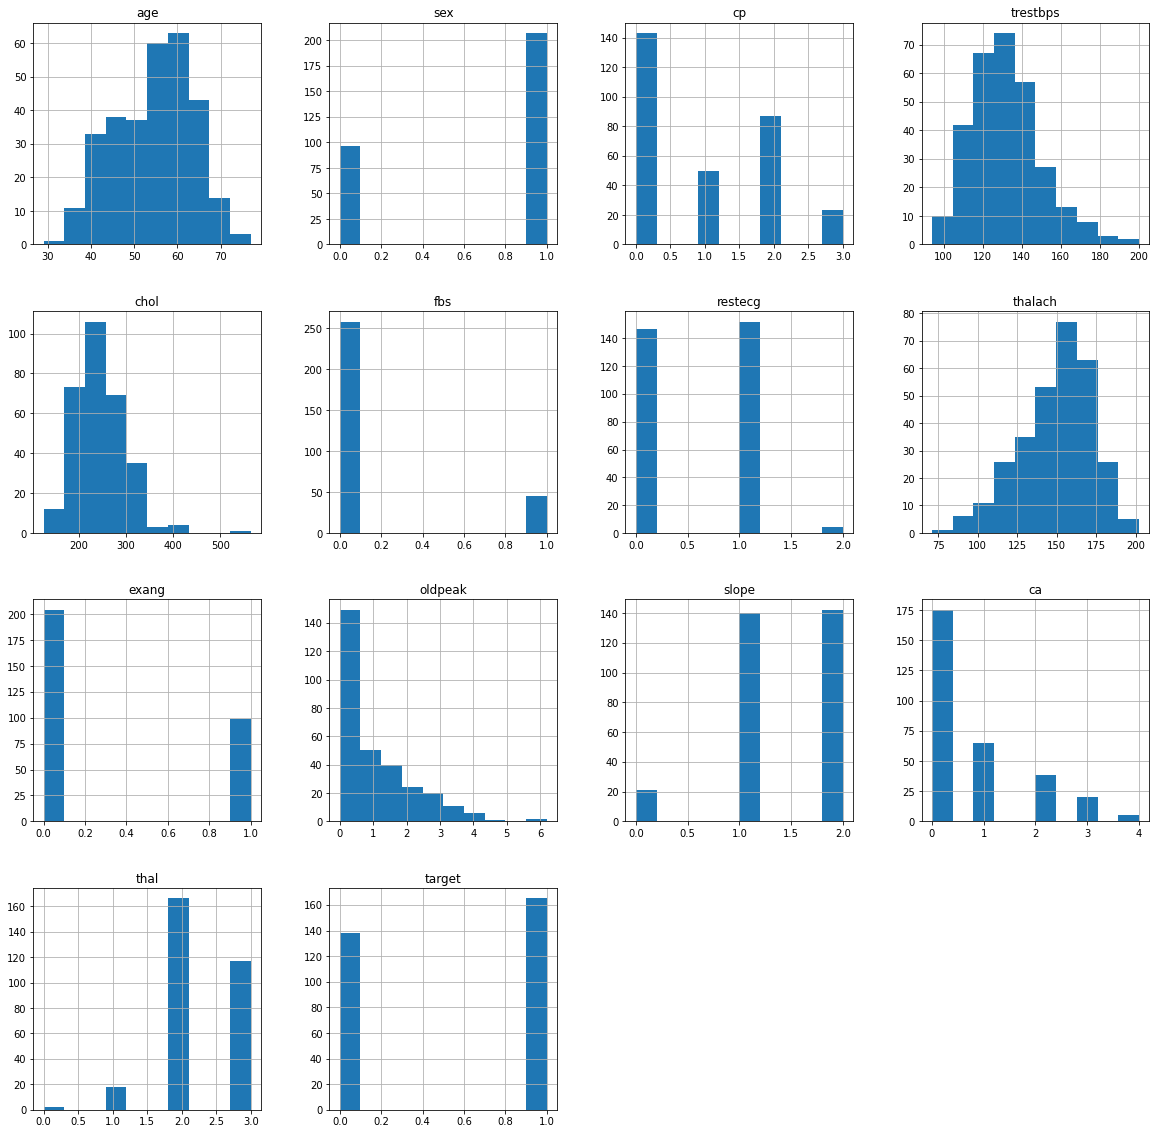

In [8]:
df.hist(figsize=(20,20))

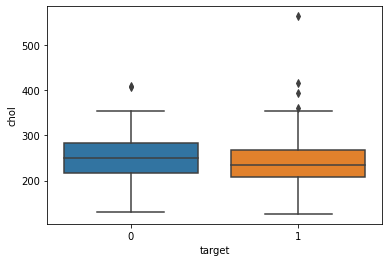

In [9]:
sns.boxplot(x='target', y='chol', data=df)

Text(0.5, 1.0, 'Sex Distribution')

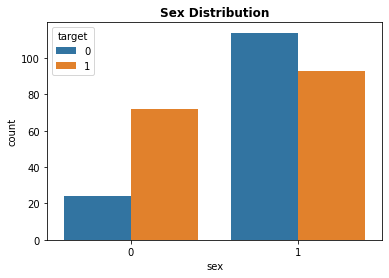

In [10]:
ax = sns.countplot(x='sex', hue='target', data=df)
ax.set_title("Sex Distribution", weight = 'bold')

Text(0.5, 1.0, 'Chest Pain Distribution')

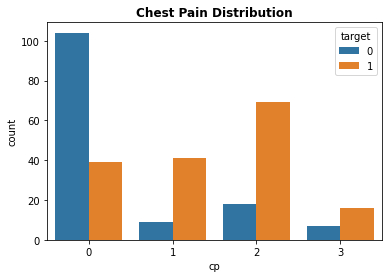

In [11]:
ax = sns.countplot(x='cp', hue='target', data=df)
ax.set_title("Chest Pain Distribution", weight = 'bold')

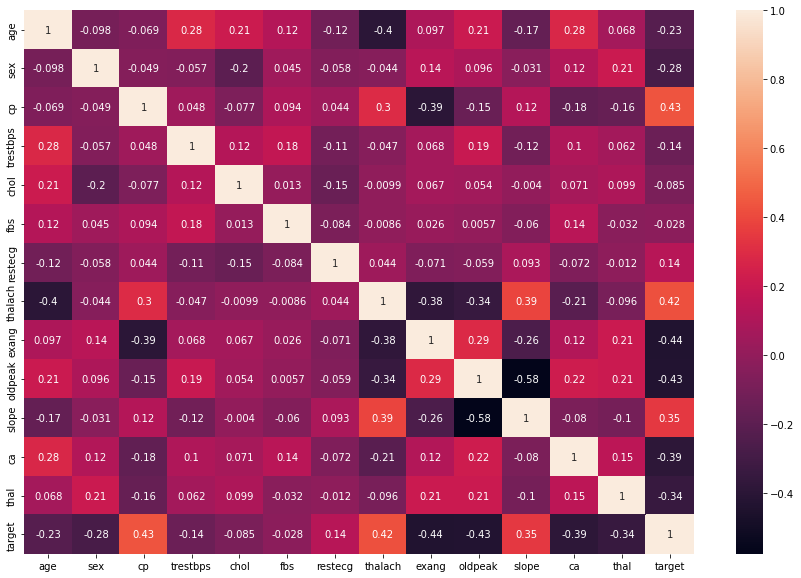

In [12]:
#understanding the relationship between variables
correlation = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

## Data Preprocessing

In [13]:
df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

### Scale the dataset

In [14]:
sc = StandardScaler()
scaling = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[scaling] = sc.fit_transform(df[scaling])

In [15]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [16]:
df.shape

(303, 31)

In [17]:
X = df.drop('target', axis=1)
print("Shape: ", X.shape)
X.head()

Shape:  (303, 30)


,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [18]:
Y = df['target']
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

## Train and test split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1)

In [20]:
print("Shape of x_train data: ", x_train.shape)
print("Shape of x_test data: ", x_test.shape)

Shape of x_train data:  (242, 30)
Shape of x_test data:  (61, 30)


## Prediction Models

### Model 1: Support Vector Classifier

In [21]:
svm_model = SVC(kernel = 'linear')

In [22]:
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [23]:
svm_y_pred = svm_model.predict(x_test)

In [24]:
x_predict = list(svm_y_pred)
svm_predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
pd.DataFrame(svm_predicted_df)

,predicted_values,original_values
172,1,0
261,1,0
142,1,1
114,1,1
43,1,1
...,...,...
289,0,0
291,0,0
236,0,0
141,1,1


In [25]:
#accuracy score
svm_accuracy = accuracy_score(svm_y_pred, y_test)
print("Accuracy: ", svm_accuracy)

Accuracy:  0.8360655737704918


In [26]:
#precision calculates the value that says out of all total predicted positive sentiment how many were actually positive
#recall calculates the value that says out of all actual positives how many were predicted correctly positive.
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



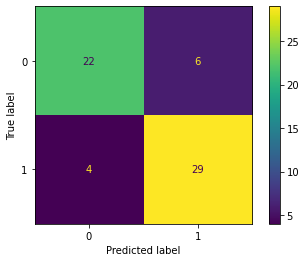

In [52]:
#performance measurement for classification problem 
cm = confusion_matrix(y_test, svm_y_pred)
matrix = ConfusionMatrixDisplay(cm)
matrix.plot()

### Model 2: Logistic Regression

In [28]:
lr_model = LogisticRegression()

In [29]:
lr_model.fit(x_train, y_train)

LogisticRegression()

In [30]:
lr_y_pred = lr_model.predict(x_test)

In [31]:
x_predict = list(lr_y_pred)
lr_predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
pd.DataFrame(lr_predicted_df)

,predicted_values,original_values
172,1,0
261,1,0
142,1,1
114,1,1
43,1,1
...,...,...
289,0,0
291,0,0
236,0,0
141,1,1


In [32]:
#accuracy score
lr_accuracy = accuracy_score(lr_y_pred, y_test)
print("Accuracy: ", lr_accuracy)

Accuracy:  0.8688524590163934


In [33]:
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.88      0.88      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



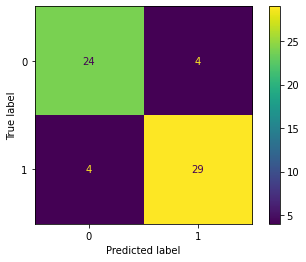

In [51]:
cm = confusion_matrix(y_test, lr_y_pred)
matrix = ConfusionMatrixDisplay(cm)
matrix.plot()

### Model 3: Random Forest Classifier

In [35]:
rf_model = RandomForestClassifier()

In [36]:
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [37]:
rf_y_pred = rf_model.predict(x_test)

In [38]:
x_predict = list(rf_y_pred)
rf_predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
pd.DataFrame(rf_predicted_df)

,predicted_values,original_values
172,1,0
261,1,0
142,1,1
114,1,1
43,1,1
...,...,...
289,0,0
291,0,0
236,0,0
141,1,1


In [39]:
#accuracy score
rf_accuracy = accuracy_score(rf_y_pred, y_test)
print("Accuracy: ", rf_accuracy)

Accuracy:  0.819672131147541


In [40]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



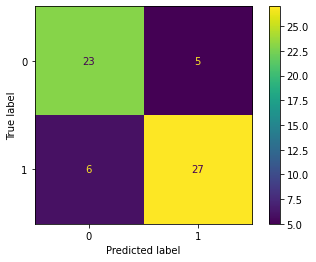

In [50]:
cm = confusion_matrix(y_test, rf_y_pred)
matrix = ConfusionMatrixDisplay(cm)
matrix.plot()

### Model 4: K Neighbors Classifier

In [42]:
knn_model = KNeighborsClassifier(n_neighbors=7)

In [43]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [44]:
knn_y_pred = knn_model.predict(x_test)

In [45]:
x_predict = list(knn_y_pred)
knn_predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
pd.DataFrame(knn_predicted_df)

,predicted_values,original_values
172,1,0
261,0,0
142,1,1
114,1,1
43,1,1
...,...,...
289,0,0
291,0,0
236,0,0
141,1,1


In [46]:
#accuracy score
knn_accuracy = accuracy_score(knn_y_pred, y_test)
print("Accuracy: ", knn_accuracy)

Accuracy:  0.8688524590163934


In [47]:
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.88      0.88      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



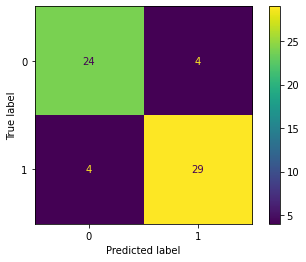

In [49]:
cm = confusion_matrix(y_test, knn_y_pred)
matrix = ConfusionMatrixDisplay(cm)
matrix.plot()

# Summary
In this task, I have used four machine learning models to predict the heart disease in people. The highest accuracy score (0.868) was obtained by using logistic regression and K neighbors classifier models. The accuracy score for other models i.e. for the support vector classifier is 0.836 and for the random forest classifier is 0.819.

#### References:
* https://towardsdatascience.com/predicting-presence-of-heart-diseases-using-machine-learning-36f00f3edb2c